# 1. Review: LBA Part 1

The algorithm used in the first part of this assignment can be thought of as a rough draft toward generating a optimal scheduler. The schedulers working could be only possible under some strict restrictions, which do not seem feasible when we look at real-life, like no possibility of multitasking and waiting for tasks when a time constraint task is coming up instead of trying to do the shorter task during that time period. So we realize that by choosing specific values for time constraints for some tasks like choosing 12:00 PM for a game, we can make the schedule suboptimal. This is possible if right now the time is 11:50 AM and the task that has the next priority task has 20 minutes of duration; however, we still have a task in our queue that takes only 10 minutes and would be the perfect fit here but has the lowest priority. The algorithm will not be able to complete this task of 20-minute duration, and instead of going for the shorter task to fill the gap, it would have to wait for 12:00 PM and do that first. The algorithm also failed when we tried to change the task ids of the tasks, which meant that there was some sort of unreasonable dependency of the schedule on the task ID, which does not make sense and will need to be fixed.

Another issue we have to face is going over the daily time period, meaning when a person has a lot of stuff in his schedule, the schedule will go over the day period, which will ruin the purpose of the task scheduler. Thus, we need to be careful when we input the tasks that need to be completed to ensure that it is feasible to complete them in one day while also taking note of the fact that the scheduler should just stop assigning activities if we have reached the end of the day.

Another issue I found was that the schedule was created in one go and did not go on a step-wise basis, waiting until after a task was completed. This would mean the first scheduler that we get will be the final one we are using, which in some cases would not go well as some activities can take longer than what we estimated, and some can take a shorter time. Like if I am watching a football match, I would estimate that it will take 105 minutes, considering the match length and the break. Still, there is a possibility the match will go into extra time, and thus the duration of the task will go from 105 minutes to 140 minutes. On the other hand, while we are having breakfast, we might finish it before our estimated time and thus end up having some extra time left. By taking a sequence-wise scheduler that would take our duration after we have completed the task and aided by the factor of priority value, we will be able to complete the highest priority tasks in time.

However, I think my initial scheduler did well when analyzing the priority. It could schedule the task with higher priority first, which allowed us to maximize our profit value. Furthermore, even if something urgent came up and we had to leave our schedule midway, we would have already completed the tasks with the highest profit value and thus would not feel too bad.

Word COunt: 550 words

# What is an Optimal Scheduler?

An optimal scheduler will ideally try to answer all the concerns and issues that I have mentioned above. It should be able to take into consideration the profit values that we assign it, look to maximize this profit value instead of trying to fit as many activities as possible in the schedule, be able to be edited midway if need be, and be able to ensure that we are not going over the time of one day. To make the system of profits more realistic, we should also consider adding losses when assigning profits to the priority and try to minimize these losses; if we were to go to Potsdam, the profit value would be high as we can travel, but it will also cost us money which will be considered as a loss. Hence, the loss also has to be factored in when we are finalizing our profits for a task. However, this can be just implemented when we write our priority values, and thus we do not need to define a separate attribute for it.

# 2. Multitasking

A. The first addition is straightforward. We will need to add another attribute for the tasks; thus, we create called multi_tasking. This will simply hold a Boolean value which suggests whether or not a task is multitaskable or not. Now we need to ensure that the tasks that are taking place together make sense and are practical. One approach can be to define another attribute called multi_task_with, an array that can hold all the other tasks a particular task can be multitasked with. We can also consider how much duration will be of all these tasks taking place together. We can use the duration of the longest task as it will encompass all the shorter tasks with it. 

The other way is to make a method focused solely on multitasking. This method will handle all the computations needed for scheduling. We can first implement a check to see which tasks are multi-taskable and which are not. The tasks that are not multi-taskable can be pushed inside a temporary list, and then we can deal with the multi-taskable tasks. We can see the duration of these tasks and appropriately show which task will be finished at what time. For example, tasks 1 and 2 are multi-taskable, 1 takes 20 minutes, and 2 takes 30 minutes first; we show 1 completed after 20 minutes and then show 2 completed 10 minutes later. After dealing with the multi-taskable tasks within the same class, we can push the non-multi-taskable task into the priority queue again and handle them accordingly.

B. I originally utilized two priority queues to help me arrange my data in terms of time constraint tasks and priority. This allowed me to handle task priority effectively while also managing the time constraints within my schedule. The time-constrained queue would pop up whenever the time for this task was coming up, and with a simple check, we will see if no other task can be done before the time constraint task. If true, we will proceed with the time constraint task. If we were to use an additional priority queue, it might be helpful when accessing root node values quickly. Thus we will be able to get rid of our multitaskable tasks in the most effective way possible. However, introducing this priority queue specifically for multitaskable tasks might complicate the code. Including a method instead can be an effective approach to carrying out multitaskable tasks. This way, we can check which tasks are multitaskable and do them together. Also, building upon the previously mentioned attribute, multi_task_with, we can use it like the attribute dependencies and ensure that only suitable multitaskable tasks are done together.

# 3. Algorithmic Strategies.

### Greedy Algorithm

When we are going for the greedy algorithm approach, we mainly try to fulfill the greedy property, which states that we will reach our optimal subset for the overall problem by making the best choice at each point. This approach will not necessarily provide us with the best results all the time, but we will be able to reach our optimal solution in certain cases.

We can implement this by considering the available tasks that have the highest priority. We also need to ensure that it passes certain checks like having their dependencies fulfilled and not crossing the upper bound for the time that we have set. If it fulfills the criteria, the task is implemented. So going step by step through each task that is provided, we do these checks, and if the task is feasible, we do it; otherwise, we move on to the next task, which has the highest priority after the one we were looking at. The main focus of this strategy is to analyze the priority value as a whole and compare it to the priority of the other tasks, with the duration attribute being used to check if the task is currently feasible.

#### Pseudocode:

class MultiTaskScheduler_Greedy:


.

.


    def run_task_scheduler(self, starting_time = 480):
    
        current_time = starting_time       #set start time to be current time
        
        profit = 0                         #set total profit equal to 0
        
        while (there are unscheduled tasks) or (tasks in the priority queue) or (tasks in the time constraint queue):
        
            get a list of tasks without dependencies i.e. tasks whose dependencies have been done already
            
            if current_time//60 > 24:   #check to make sure day hasn't ended
            
                break #end the scheduler
            
            if (tasks in time constraint queue) and (tasks in priority queue):
                time constraint task = copy root node of time constraint queue
                priority task = copy root node of priority queue
                
                if priority task cannot be done before the next time constraint task:
                    task = root node of time constraint queue
                    current_time = self.multi_tasker(task, current_time) #method is called to check whether task is multitaskable or not and then do the appropriate computations
                    
            if task in time constraint queue and no task in priority queue:
                task = root node of time constraint queue
                current_time = self.multi_tasker(task, current_time)
                
                
            if task in priority queue:
                task = root node of priority queue
                current_time = self.multi_tasker(task, current_time)
                
       total_time = current_time - starting_time
       
       print(time taken to complete the provided tasks)
       print(total profit gained)


#### Data Structures:

The data structures we used for the greedy approach implementation of the task scheduler are heaps and classes.

We use heaps when we sort the tasks based on their priority value and when we are sorting the time-constrained tasks. This is effective as heaps are very efficient when it comes to sorting tasks compared to other sorting methods like when we are sorting lists on their own. Heaps also have the benefit of making retrieval of tasks easier as to get the highest priority task; we can just call the root node. 

The second data structure used is classes. We have used three classes in our implementation. The first class is Maxheapq which contains all the methods and attributes needed to use heap. The second class is Task which takes the input and compiles it without doing anything to the input. It just has attributes and no functionality otherwise. The third class is TaskScheduler which contains all the main methods required to compute the scheduler. The reason for keeping the Task and TaskScheduler class separate is to make it easy to maintain our code. If we want to edit how the algorithm perceives a certain input, we can just make edits to the Task class. If we want to make any edits to how we are setting the priorities and scheduling the data, we can change the TaskScheduler class. Keeping them separate allows us to make edits in one place without worrying about what happens in other places.

#### Assumptions:
The first assumption we are making is that the user understands that if they include a lot of tasks or tasks with a longer duration, it will not be possible to complete all the tasks. So the scheduler will skip the tasks with lower priority values if we cannot fit the schedule into one day. The user can try to ensure that they are able to properly assign the values for priority based on what activities have to be done today, no matter what.

The second assumption we make is that the user knows what profit value they will assign to each task. This is crucial as our algorithm heavily relies on how the priority values have been assigned and if there was a mislabeling of a priority value for a particular task that can mess up the schedule.

#### Code:

In [1]:
class Maxheapq:
    """ 
    A class that implements properties and methods 
    that support a max priority queue data structure

    Attributes
    ----------
    heap : array
    A Python list where key values in the max heap are stored
    heap_size: int
    An integer counter of the number of keys present in the max heap
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value which accesses the priority of task

        Returns
        ----------
        None
        """
        
        if key.priority < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be heapify
            The priority value of the nodes is accessed

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority>heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)
    
    def heappop(self):
        """
        returns the largest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk



In [30]:
class Task:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 100)   
    - status: Current status of the task:       
    - time_constraint: time constraint of task
   
    """
    
    #Initializes an instance of Task
    def __init__(self,task_id,description,duration,dependencies,status,priority,time_constraint, multi_tasking):
        self.id = task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.status=status
        self.time_constraint = time_constraint
        self.multi_tasking = multi_tasking
        
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}\n\tPriority: {self.priority}\t\nTime constraint: {self.time_constraint}\n\tMulti Tasking: {self.multi_tasking}"

    def __lt__(self, other):
        return self.priority < other.priority    
    

In [3]:
class Greedy_TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues, considering fixed time constraints
    """
    
    #Initialize the status of tasks
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    #Initialize the task list and the priority queues, with and without time constraint
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = Maxheapq()
        self.time_constraint_queue = Maxheapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        #Example: If task_id is 1, then it removes 1 from the dependencies
        #of all the tasks that have it as a dependency

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: two list of tasks, one time constraint and one without time constraint,
                that are ready to execute (i.e. tasks with no pending task dependencies)
        """
        
        for task in self.tasks:
            #Check for tasks that do not have time constraint
            if task.status == self.NOT_STARTED and len(task.dependencies) == 0 and task.time_constraint == 'None': 
                
                task.status = self.IN_PRIORITY_QUEUE #As task can be done there is a status change
                
                #Push task into the priority queue that is not time constraint
                self.priority_queue.heappush(task)
                
            elif task.status == self.NOT_STARTED and task.dependencies == [] and isinstance(task.time_constraint, int):
                task.status = self.IN_PRIORITY_QUEUE#As task can be done there is a status change
                # Push task into the priority queue that is time constraint
                self.time_constraint_queue.heappush(task)
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
                                
    
    def multi_tasker(self, task, current_time, profit):
        if task.multi_tasking:
            temp = []
            while(self.priority_queue.heap_size > 0 and (not self.priority_queue.maxk().multi_tasking or 
                                                         (self.time_constraint_queue.heap_size > 0 and 
                                                          (self.priority_queue.maxk().duration > 
                                                           self.time_constraint_queue.maxk().duration)))):
                temp.append(self.priority_queue.heappop())
            #if tasks left in prirority queue we can multitask with them
            if self.priority_queue.heap:
                multitask = self.priority_queue.heappop()
                if (current_time + task.duration)//60 < 24 and (current_time + multitask.duration)//60 < 24:
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing tasks {task.id} and {multitask.id} that take {task.duration} and {multitask.duration} mins respectively")
                
                #Increment current time with longer tasks duration as the task will be in process even if the first task is completed
                if task.duration < multitask.duration:
                    current_time += task.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        current_time += multitask.duration - task.duration
                        print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
                else:
                    current_time += multitask.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
                        print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        current_time += task.duration - multitask.duration
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
                self.remove_dependency(task.id)
                self.remove_dependency(multitask.id)
                task.status = self.COMPLETED
                multitask.status = self.COMPLETED
            #if the priority queue is empty there will be no multitaskable tasks and we just perform the intial task
            else:
                if ((current_time + task.duration)//60 < 24):
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")  
                    profit += task.priority
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
            #After finishing the tasks we move the tasks back into the priorioty queue
            for i in temp:
                self.priority_queue.heappush(i)
        #if no multitaskable tasks present, we schedule like any normal task.
        else:
            if (current_time + task.duration)//60 < 24:
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                profit += task.priority
            self.remove_dependency(task.id) 
            task.status = self.COMPLETED
        
        return current_time, profit
            
                              
    def run_task_scheduler(self, starting_time = 480):
        
        '''
        The key method of this class which prints out the whole task schedule
        
        Input: List of tasks and starting time in Hour*60
        
        Output: The order of doing the tasks, what time to do them, how long it takes to do them, 
                and the total time taken to complete all tasks.
        '''
        
        current_time = starting_time
        profit = 0
        
        #Acts as a termination case which terminates the method when there no more tasks left to be done, none in either queue and no unstarted tasks
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0 or self.time_constraint_queue.heap_size > 0:
            
            #Extract the tasks that are ready to be executed and have no dependecies
            
            self.get_tasks_ready()
            
            if current_time//60 > 24:
                print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
                break
                
            #Condition when tasks are ready to be executed in both queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size > 0:
                
                #Selects the top most tasks from both queues and assigns them to variables without removing them from heap
                time_constraint_task = self.time_constraint_queue.maxk()
                priority_task = self.priority_queue.maxk()

                #If we do the task in the priority queue, will we miss our fixed time constraint task?
                #Example: if a task finishes after the starting time of the Consequential conversation, we want to 
                #do the Consequential conversation task first.
                
                #Check to see if we cannot complete the task in priority queue before the time constraint task
                if priority_task.duration + current_time > time_constraint_task.time_constraint:
                    
                    #Select top task from time constraint queue and remove it from the queue
                    task = self.time_constraint_queue.heappop()
                    current_time, profit = self.multi_tasker(task, current_time, profit)
            
            #Condition when the task ready to be executed are only present in the time constraint queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size == 0:
                
                #Select top task from time constraint queue and remove it from the queue
                task = self.time_constraint_queue.heappop()
                
                current_time, profit = self.multi_tasker(task, current_time, profit)
            
            #Condition when the task ready to be executed are only present in the main priority queue
            if self.priority_queue.heap_size > 0 :  
                
                #Select top task from priority queue and remove it from the queue
                task = self.priority_queue.heappop()
                current_time, profit = self.multi_tasker(task, current_time, profit)

        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        print(f"Total profit = {profit}")


In [4]:
import pandas as pd
#Create a dictionary of tasks and store it in task_table

task_table = {'ID': [i for i in range(1,18)],'Description':['Take an antigen test',
                                                      'Turn on my Laptop', 
                                                      'Gather a group of friends',
                                                      'Get ready to play football(gather all required things)', 
                                                      'Go to the ground and play',
                                                      'Book a car on ShareNow', 
                                                      'Drive to Postdam', 
                                                      'Choose which video game to play',
                                                      'Wait for friends to join video game', 
                                                      'Play the video game', 
                                                      'Do some research on the German Spy Museum',
                                                      'Buy Ticket for the museum', 
                                                      'Go to the musemum and enjoy',
                                                      'Check your bank Balance',
                                                       'Go to Brandunberg Gate alone',
                                                           'Waking up',
                                                           'Breakfast'],
         'Duration':[30, 2, 20, 15, 150, 5, 150, 5, 5, 120, 30, 10, 70, 5, 130, 30, 15],
         'Dependencies':[[], [], [], [3], [4], [2, 3], [1, 6], [2], [8], [9], [2], [14], [12], [2], [], [], [16]],
         'Status':['N' for i in range(17)],
         'Priority':[100, 100, 20, 50, 60, 60, 80, 10, 10, 20, 70, 80, 90, 100, 5, 100, 75],
         'Fixed Time Constraint':['None', 'None', 'None', 'None', 900, 'None', 'None', 'None', 'None', 'None', 'None', 'None',
                                 720, 'None', 'None', 480, 'None'],
         'Multi Tasking': [False, False, False, False, False, False, False, True, True, False, True, False, False, True,
                              False, False, True]}

#Turn the dictionary of tasks into a pandas data frame
df = pd.DataFrame(task_table)
df

,ID,Description,Duration,Dependencies,Status,Priority,Fixed Time Constraint,Multi Tasking
0,1,Take an antigen test,30,[],N,100,None,False
1,2,Turn on my Laptop,2,[],N,100,None,False
2,3,Gather a group of friends,20,[],N,20,None,False
3,4,Get ready to play football(gather all required...,15,[3],N,50,None,False
4,5,Go to the ground and play,150,[4],N,60,900,False
5,6,Book a car on ShareNow,5,"[2, 3]",N,60,None,False
6,7,Drive to Postdam,150,"[1, 6]",N,80,None,False
7,8,Choose which video game to play,5,[2],N,10,None,True
8,9,Wait for friends to join video game,5,[8],N,10,None,True
9,10,Play the video game,120,[9],N,20,None,False


In [5]:
#Store the tasks in the pandas data frame as a list
tasks_list = [Task(*list(df.iloc[i])) for i in range(17)]

#Initialize TaskScheduler class the list tasks
task_scheduler = Greedy_TaskScheduler(tasks_list)

#Run the task scheduler!
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 16 that takes 30 mins
✅ Completed Task 16 - 'Waking up' at time 8h30

⏰Simple Scheduler at time 8h30 started executing task 1 that takes 30 mins
✅ Completed Task 1 - 'Take an antigen test' at time 9h00

⏰Simple Scheduler at time 9h00 started executing task 2 that takes 2 mins
✅ Completed Task 2 - 'Turn on my Laptop' at time 9h02

⏰Simple Scheduler at time 9h02 started executing tasks 14 and 17 that take 5 and 15 mins respectively
✅ Completed Task 14 - 'Check your bank Balance' at time 9h07

✅ Completed Task 17 - 'Breakfast' at time 9h17

⏰Simple Scheduler at time 9h17 started executing task 12 that takes 10 mins
✅ Completed Task 12 - 'Buy Ticket for the museum' at time 9h27

⏰Simple Scheduler at time 9h27 started executing tasks 11 and 8 that take 30 and 5 mins respectively
✅ Completed Task 8 - 'Choose which video game to play' at time 9h32

✅ Completed Task 11 - 'Do some research on the German Spy Museum' at time 9h57

⏰Simple Sche

#### Test Case

The initial test case above was able to check for multitaskablity, time constraints, and sorting of tasks by priority. Now we just need to check if the tasks stop after we reach the end of the day.

In [6]:
#Create a dictionary of tasks and store it in task_table

test_table_1 = {'ID': [i for i in range(1,12)],'Description':['A',
                                                      'B', 
                                                      'C',
                                                      'D', 
                                                      'E',
                                                      'F', 
                                                      'G', 
                                                      'H',
                                                      'I', 
                                                      'J',
                                                        'K'],
         'Duration':[100, 40, 300, 10, 180, 80, 180, 70, 40, 50, 330],
         'Dependencies':[[], [1], [], [], [7], [], [3], [], [], [], []],
         'Status':['N' for i in range(11)],
         'Priority':[100, 75, 30, 40, 90, 70, 55, 30, 20, 50, 90],
         'Fixed Time Constraint':['None' for i in range(11)],
         'Multi Tasking': [False, False, False, False, False, False, False, False, False, False, False]}

#Turn the dictionary of tasks into a pandas data frame
df = pd.DataFrame(test_table_1)
df

,ID,Description,Duration,Dependencies,Status,Priority,Fixed Time Constraint,Multi Tasking
0,1,A,100,[],N,100,None,False
1,2,B,40,[1],N,75,None,False
2,3,C,300,[],N,30,None,False
3,4,D,10,[],N,40,None,False
4,5,E,180,[7],N,90,None,False
5,6,F,80,[],N,70,None,False
6,7,G,180,[3],N,55,None,False
7,8,H,70,[],N,30,None,False
8,9,I,40,[],N,20,None,False
9,10,J,50,[],N,50,None,False


In [7]:
#Store the tasks in the pandas data frame as a list
test_tasks_list = [Task(*list(df.iloc[i])) for i in range(10)]

#Initialize TaskScheduler class the list tasks
task_scheduler = Greedy_TaskScheduler(test_tasks_list)

#Run the task scheduler!
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 1 that takes 100 mins
✅ Completed Task 1 - 'A' at time 9h40

⏰Simple Scheduler at time 9h40 started executing task 2 that takes 40 mins
✅ Completed Task 2 - 'B' at time 10h20

⏰Simple Scheduler at time 10h20 started executing task 6 that takes 80 mins
✅ Completed Task 6 - 'F' at time 11h40

⏰Simple Scheduler at time 11h40 started executing task 10 that takes 50 mins
✅ Completed Task 10 - 'J' at time 12h30

⏰Simple Scheduler at time 12h30 started executing task 4 that takes 10 mins
✅ Completed Task 4 - 'D' at time 12h40

⏰Simple Scheduler at time 12h40 started executing task 3 that takes 300 mins
✅ Completed Task 3 - 'C' at time 17h40

⏰Simple Scheduler at time 17h40 started executing task 7 that takes 180 mins
✅ Completed Task 7 - 'G' at time 20h40

⏰Simple Scheduler at time 20h40 started executing task 5 that takes 180 mins
✅ Completed Task 5 - 'E' at time 23h40

🏁 Completed all planned tasks in 15h40min
Total profit = 510


#### Time Complexity Theoretical Analysis

We can use the time recurrence relations based on the algorithm to find the time complexity of the greedy algorithm. 

Calculation:

Multi_tasker() = O(n) as we run the function on all tasks, and we are saying there are n tasks available.

Run_taskscheduler() = O(n). This does the same thing by running the tasks which we say are n.

The extraction of root nodes takes O(1) time, and we can multiply it with a constant depending on the number of tasks we are handling to get C * O(1).

We can look at the specific method heappush() and calculate its time complexity is O(n logn) as it iterates through the number of elements in the list that it has to push, which is n and the time for insertion is logn.

Some of the methods in the TaskScheduler class, like get_tasks_ready and get_unscheduled_tasks() take O(n) time which if we repeat for a specific constant number of times, we will get K * O(n).

Putting this all together, we get:

T(n) = O(n) + O(n) + CO(1) + O(n logn) + KO(n)

The terms for O(n) can be put together with just the constant K instead of a numeric constant.

T(n) = CO(1) + O(n logn) + KO(n)

As we approach asymptotic notation, we can potentially remove the terms that are lower than the highest power of n as their growth rate is negligible compared to the highest power. So as we have O(n logn) as our Big O with the highest importance, we can get rid of all the other terms. Thus we are left with:

T(n) = O(n logn)

This time recurrence relation means that with each task that we add to the scheduler, there will be an n logn factor of increase in the runtime of the algorithm. This is because the algorithm will face an n logn number of increases in the comparisons, iterations, and processing that it has to do.

#### TIme Complexity Experimental Analysis

In [8]:
class Greedy_TaskScheduler_no_print:
    """
    A Simple Daily Task Scheduler Using Priority Queues, considering fixed time constraints
    """
    
    #Initialize the status of tasks
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    #Initialize the task list and the priority queues, with and without time constraint
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = Maxheapq()
        self.time_constraint_queue = Maxheapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        #Example: If task_id is 1, then it removes 1 from the dependencies
        #of all the tasks that have it as a dependency

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: two list of tasks, one time constraint and one without time constraint,
                that are ready to execute (i.e. tasks with no pending task dependencies)
        """
        
        for task in self.tasks:
            #Check for tasks that do not have time constraint
            if task.status == self.NOT_STARTED and len(task.dependencies) == 0 and task.time_constraint == 'None': 
                
                task.status = self.IN_PRIORITY_QUEUE #As task can be done there is a status change
                
                #Push task into the priority queue that is not time constraint
                self.priority_queue.heappush(task)
                
            elif task.status == self.NOT_STARTED and task.dependencies == [] and isinstance(task.time_constraint, int):
                task.status = self.IN_PRIORITY_QUEUE#As task can be done there is a status change
                # Push task into the priority queue that is time constraint
                self.time_constraint_queue.heappush(task)
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
                                
    
    def multi_tasker(self, task, current_time, profit):
        if task.multi_tasking:
            temp = []
            while(self.priority_queue.heap_size > 0 and (not self.priority_queue.maxk().multi_tasking or 
                                                         (self.time_constraint_queue.heap_size > 0 and 
                                                          (self.priority_queue.maxk().duration > 
                                                           self.time_constraint_queue.maxk().duration)))):
                temp.append(self.priority_queue.heappop())
            #if tasks left in prirority queue we can multitask with them
            if self.priority_queue.heap:
                multitask = self.priority_queue.heappop()
#                 if (current_time + task.duration)//60 < 24 and (current_time + multitask.duration)//60 < 24:
#                     print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing tasks {task.id} and {multitask.id} that take {task.duration} and {multitask.duration} mins respectively")
                
                #Increment current time with longer tasks duration as the task will be in process even if the first task is completed
                if task.duration < multitask.duration:
                    current_time += task.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
#                         print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        current_time += multitask.duration - task.duration
#                         print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
#                     else:
#                         print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
#                         break
                else:
                    current_time += multitask.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
#                         print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        current_time += task.duration - multitask.duration
#                         print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
#                     else:
#                         print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
#                         break
                self.remove_dependency(task.id)
                self.remove_dependency(multitask.id)
                task.status = self.COMPLETED
                multitask.status = self.COMPLETED
            #if the priority queue is empty there will be no multitaskable tasks and we just perform the intial task
            else:
                if ((current_time + task.duration)//60 < 24):
#                     print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
#                     print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")  
                    profit += task.priority
#                 else:
#                     print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
#                     break
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
            #After finishing the tasks we move the tasks back into the priorioty queue
            for i in temp:
                self.priority_queue.heappush(i)
        #if no multitaskable tasks present, we schedule like any normal task.
        else:
            if (current_time + task.duration)//60 < 24:
#                 print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
#                 print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                profit += task.priority
#             else:
#                 print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
#                 break
            self.remove_dependency(task.id) 
            task.status = self.COMPLETED
        
        return current_time, profit
            
                              
    def run_task_scheduler(self, starting_time = 480):
        
        '''
        The key method of this class which prints out the whole task schedule
        
        Input: List of tasks and starting time in Hour*60
        
        Output: The order of doing the tasks, what time to do them, how long it takes to do them, 
                and the total time taken to complete all tasks.
        '''
        
        current_time = starting_time
        profit = 0
        
        #Acts as a termination case which terminates the method when there no more tasks left to be done, none in either queue and no unstarted tasks
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0 or self.time_constraint_queue.heap_size > 0:
            
            #Extract the tasks that are ready to be executed and have no dependecies
            
            self.get_tasks_ready()
            
            if current_time//60 > 24:
                print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
                break
                
            #Condition when tasks are ready to be executed in both queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size > 0:
                
                #Selects the top most tasks from both queues and assigns them to variables without removing them from heap
                time_constraint_task = self.time_constraint_queue.maxk()
                priority_task = self.priority_queue.maxk()

                #If we do the task in the priority queue, will we miss our fixed time constraint task?
                #Example: if a task finishes after the starting time of the Consequential conversation, we want to 
                #do the Consequential conversation task first.
                
                #Check to see if we cannot complete the task in priority queue before the time constraint task
                if priority_task.duration + current_time > time_constraint_task.time_constraint:
                    
                    #Select top task from time constraint queue and remove it from the queue
                    task = self.time_constraint_queue.heappop()
                    current_time, profit = self.multi_tasker(task, current_time, profit)
            
            #Condition when the task ready to be executed are only present in the time constraint queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size == 0:
                
                #Select top task from time constraint queue and remove it from the queue
                task = self.time_constraint_queue.heappop()
                
                current_time, profit = self.multi_tasker(task, current_time, profit)
            
            #Condition when the task ready to be executed are only present in the main priority queue
            if self.priority_queue.heap_size > 0 :  
                
                #Select top task from priority queue and remove it from the queue
                task = self.priority_queue.heappop()
                current_time, profit = self.multi_tasker(task, current_time, profit)

        total_time = current_time - starting_time             
#         print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
#         print(f"Total profit = {profit}")


In [9]:
# Random

import random



def random_tasks_generator_greedy(n=10):
    '''
    Makes a dictionary that contains randomized tasks
    
    Input: number of tasks
    Output: Dictionary of randomized tasks
    '''

    #Initialize table with ordered task description and random durations and priorities
    test_table = {'ID': [i for i in range(1,n+1)],'Description':[f'Task {i}' for i in range(1,n+1)],
            'Duration':[random.randint(1,60) for i in range(n)],
            'Dependencies':[],
            'Status':['not_yet_started' for i in range(n)],
            'Priority':[random.randint(0,100) for i in range(n)],
            'Fixed Time Constraint':[],
                  'Multi Tasking':[]}

    
    #Set ids
    ids = [i for i in range(1,n+1)]
    
    #Initialize dependencies
    dependencies = []
    
    #Dependencies defined in an order to remove repetetions and circular dependecies
    for i in range(2,n+1,3):#
        
        lst = []
        lst.append(i)
        dependencies.append(lst)
    for i in range(n-len(dependencies)):
        dependencies.append([])
    
    test_table['Dependencies'] = dependencies
    
    #Time constraints defined in random order to generate some tasks with no time constraint and some with them
    times = []
    for i in range(n):
        if random.random() < 0.5:
            times.append('None')
        else:
            sample = random.randrange(480,1440,240)
            if sample in times:
                times.append('None')
            else:
                times.append(sample)
        test_table['Fixed Time Constraint'] = times
    
    #Multi Tasks list initialized
    multi_tasking = []
    for i in range(n):
        #Randomly assigning values of True and False to different tasks with a 50-50 chance of each task of getting either value
        if random.random() < 0.5:
            multi_tasking.append(False)
        else:
            multi_tasking.append(True)
    test_table['Multi Tasking'] = multi_tasking
    return test_table


In [31]:
import time

runtime_list_greedy = []
inputs_list = [n for n in range(1,1000,100)]
experiments = 100
for n in inputs_list:
    #Initialize variable to calculate the average for each input size
    sum_for_average = 0
    
    #Running trials to get an average value
    for trial in range(experiments):
        
        #Generate random tasks
        test_tasks = random_tasks_generator_greedy(n)
        test_tasks_df = pd.DataFrame(test_tasks)
        
        
        tasks = [Task(*list(test_tasks_df.iloc[i])) for i in range(n)]
        
        #Runtime calcuation
        start_time = time.time()
        task_scheduler = Greedy_TaskScheduler_no_print(tasks)
        task_scheduler.run_task_scheduler()
        end_time = time.time()
        sum_for_average += end_time - start_time
        
    runtime_list_greedy.append(sum_for_average/experiments)



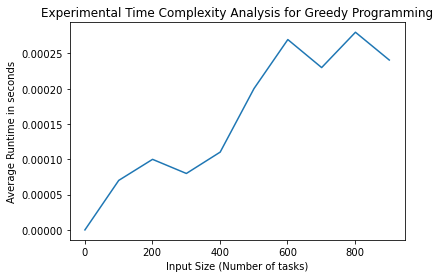

In [32]:
import matplotlib.pyplot as plt

plt.ylabel('Average Runtime in seconds')
plt.xlabel('Input Size (Number of tasks)')

plt.title('Experimental Time Complexity Analysis for Greedy Programming')
s = plt.plot(inputs_list,runtime_list_greedy)
plt.show()

We can see from the experimental analysis that we do not end up getting a straight line, and the asymptotic behavior is somewhat similar to an n logn shape with a slight curve. Thus it is in accordance with our theoretical analysis.

#### Space Complexity Theoretical Analysis

When comparing to dynamic programming, we can see that the greedy algorithm will take less space in terms of memory as we are not using a table to find the best possible combination. Instead, we are focussing on choices made at each possible decision point. Looking at the algorithm, we can see that there is no use of nested loops, and there are some new assessments of variables and the creation of priority queues. Still, their size is limited to n, so we can say that the additional space required would be 4 * n as each integer will hold a value of 4 bytes. Thus our space complexity will be O(n).

#### Space Complexity Experimental Analysis

In [12]:
import tracemalloc #library to measure space usage

space_list_greedy = []
inputs_list = [n for n in range(1,1000,100)]
experiments = 100
for n in inputs_list:
    #Initialize variable to calculate the average for each input size
    sum_for_average = 0
    
    #Running trials to get an average value
    for trial in range(experiments):
        
        #Generate random tasks
        test_tasks = random_tasks_generator_greedy(n)
        test_tasks_df = pd.DataFrame(test_tasks)
        
        
        tasks = [Task(*list(test_tasks_df.iloc[i])) for i in range(n)]
        
        #Space/memory calcuation
        tracemalloc.start()
        task_scheduler = Greedy_TaskScheduler_no_print(tasks)
        task_scheduler.run_task_scheduler()
        end_time = time.time()
        sum_for_average += tracemalloc.get_traced_memory()[1]
        
    space_list_greedy.append(sum_for_average/experiments)
    tracemalloc.stop()

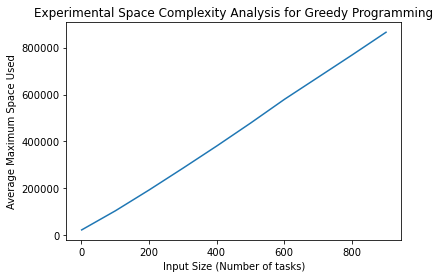

In [13]:
plt.title('Experimental Space Complexity Analysis for Greedy Programming')
plt.ylabel('Average Maximum Space Used')
plt.xlabel('Input Size (Number of tasks)')

plt.plot(inputs_list,space_list_greedy)
plt.show()

We can see that there is a small hiccup in our experimental analysis at the start. However, we can see overall that the space complexity is in accordance with our theoretical space complexity of O(n).

### Dynamic Programming

#### Description

When we are going for dynamic programming, our primary goal is to make sure that we compute our final output by combining solutions to smaller and smaller subproblems. To incorporate this into a task scheduler, we will have to compute the best possible combination of tasks that will provide us with the highest total profit value. This is done by comparing the profit values for different combinations. We can look at all the possible combinations and give the user the best possible case. In order to incorporate this approach into our algorithm, we can use a table to keep track of the best possible profit values. The algorithm will then go through each possibility and will then try to maximize the profit value by comparing it to the previous one and seeing if it is higher. If it is, then the value is noted down in the table. If, however, the new value is lower, it continues to note down the previous value as the highest. By following this method, when we reach the end of the table, the table[n][m] value is the highest possible value and thus will be our output.

#### Pseudocode:

class Dynamic_TaskScheduler:

    def get_combinations(self):
        
        times = []
        
        profits = [] #to initialize lists
        
        for task in tasks:
        
            add task duration to times
            
            add task priority to profits
            
        return times, profits
        
    def best_combo(self, maximum possible time):
    
        times = assign first list from the tuple that is returned from get_combinations
        
        profits = assign second list from the tuple that is returned from get_combinations
        
        n = length of profits list
       
        T(initiate table) = [[for x from 0 to time] for x upto n + 1]
        
        for i from 1 to n:
        
            for j from 1 to time:
            
                if i or j are 1:
                    
                    set corresponding table index to 0
                    
                else if times[i - 1] < = j:
                    
                    set corresponding table index to be the higher value from current and the index before it
                    
                else:
                    
                    set corresponding table index to have an equal value to the last visited position in the table
                    
        return T[n][j]
        
        
    def run_task_scheduler(self, starting time):
    
        Print the highest possible priority by calling self.best_combo()
        
        current_time = starting_time
        
        profit = 0
        
        while (there are any unscheduled tasks left) or (any tasks present in priority queue):
        
            get a list of tasks that can be done now (tasks with no dependecies)
            
            Simple check to see if we reached end of day:
                
                if we have reached the end of day break
                
            if there are any tasks in the priority queue:
            
                task = take the first task from priorioty_queue (pop it)
                
                run multi_tasker(task, current_time, profit) and update the current_time and profit values accordingly
                
        total_time = current_time - starting_time
        
        print current time and total profit achieved

#### Data Structures:
We used three data structures for the dynamic programming implementation of our task scheduler: heaps, classes, and tables.

When we sort tasks based on their priority value, heaps are our main go-to data structure. This is because heaps are easier to use than other sorting methods and are more time-efficient than these other methods. For our task scheduler, we have to get the current highest priority task multiple times, and with the use of heaps, it becomes easier as we just need to extract the root node in order to get the task that has the highest priority.

Our second data structure class also has been extensively used as we have used three classes in our algorithm. Maxheapq class contains all the attributes and methods needed for computing heap. Task class, which just takes in an input and compiles it into a list without doing anything to the input as it has no functionality and only possesses attributes. TaskScheduler class contains all the main functionality of the algorithm in the form of methods. The main reason for keeping the second and third classes separate is to make it easy to maintain our code. By separating them, we define two areas, Task class as the area of input. Thus we can make changes in the class Task to make edits to the inputs without touching the computing part, which is the TaskScheduler class which we will edit if we want to the way the scheduler works.

The third and last data structure used are tables, which allow us to get the best possible profit value by looking at all possible combinations of tasks that can be done and then computing the profit we will gain from each combination. All the profit values for different combinations can be compared until we get our highest profit value which will be in the bottom right position of the table.

#### Assumptions:
The first assumption we make is that the person who is inputting the information has a good sense of the profit they expect to get from each task, or they can assign the priority value well. This bit is entirely based on how the user of the scheduler thinks, and it is upon them on how they assign different profit or priority values to different tasks. Before finalizing the value of priority, I assume the person does an in-depth mental computation to decide the optimum priority values for each task by considering all the gains and losses he can get from that task.

The second assumption I have to make is that there are no time constraint tasks. We have to assume this because, in order to calculate all the possible combinations of tasks, we need them to be free of any such time constraints as only then will we be able to make different combinations freely and thus come to our best combination of tasks to do. 

The final assumption is that by dynamically checking all possible combinations of tasks, we will be able to get our optimal value for the profit value. However, this will not be able to account for the fact that we are multi-tasking because it will not be able to factor in two or more tasks being performed at the same time. This means that we will face cases where the highest possible profit value output we get from the dynamic check will be different and most probably lower than the actual value we observe from the tasks.

#### Code:

In [14]:
class Task_Dynamic:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 100)   
    - status: Current status of the task:       
   
    """
    
    #Initializes an instance of Task
    def __init__(self,task_id,description,duration,dependencies,status,priority, multi_tasking):
        self.id = task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.status=status

        self.multi_tasking = multi_tasking
        
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}\n\tPriority: {self.priority}\n\tMulti Tasking: {self.multi_tasking}"

    def __lt__(self, other):
        return self.priority < other.priority    
    

In [15]:
class Dynamic_TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues, considering fixed time constraints
    """
    
    #Initialize the status of tasks
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    #Initialize the task list and the priority queue
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = Maxheapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        #Example: If task_id is 1, then it removes 1 from the dependencies
        #of all the tasks that have it as a dependency

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: two list of tasks, one time constraint and one without time constraint,
                that are ready to execute (i.e. tasks with no pending task dependencies)
        """
        
        for task in self.tasks:
                #Check for tasks that have no dependecies
            if task.status == self.NOT_STARTED and not task.dependencies: 
                task.status = self.IN_PRIORITY_QUEUE #Status change task is now being processed
                self.priority_queue.heappush(task) # Push task into priority queue
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
    
    def get_combinations(self):
        """
        Input: list of tasks
        Output: List of task duration and task priorities.
        """
        times = []
        profits = []
        for task in self.tasks:
            times.append(task.duration)
            profits.append(task.priority)
        
        return times, profits
    
    def best_combo(self, time = 960):
        """
        Input: list of tasks and maximum possible time.
        Output: Highest possible profit value.
        """
        times, profits = self.get_combinations()
        n = len(profits)
        T = [[0 for x in range(time+1)] for x in range(n+1)]
        
        #Going through nested for loops to create a table for tasks.
        for i in range(n + 1):
            for j in range(time + 1):
                #Set of conditional statements to check which combination of tasks results in the highest profit value.
                if i == 0 or j == 0:
                    T[i][j] = 0
                elif times[i - 1] <= j:
                    T[i][j] = max(profits[i - 1] + T[i - 1][j - times[i - 1]], T[i - 1][j])
                else:
                    T[i][j] = T[i - 1][j]
                    
        return T[n][j]
    
    def multi_tasker(self, task, current_time, profit):
        if task.multi_tasking:
            temp = []
            while(self.priority_queue.heap_size > 0 and (not self.priority_queue.maxk().multi_tasking or 
                                                         (self.priority_queue.maxk().duration))):

                temp.append(self.priority_queue.heappop())
            #if tasks left in prirority queue we can multitask with them
            if self.priority_queue.heap:
                multitask = self.priority_queue.heappop()
                if (current_time + task.duration)//60 < 24 and (current_time + multitask.duration)//60 < 24:
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing tasks {task.id} and {multitask.id} that take {task.duration} and {multitask.duration} mins respectively")
                
                #Increment current time with longer tasks duration as the task will be in process even if the first task is completed
                if task.duration < multitask.duration:
                    current_time += task.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        current_time += multitask.duration - task.duration
                        print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
                else:
                    current_time += multitask.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
                        print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        current_time += task.duration - multitask.duration
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
                self.remove_dependency(task.id)
                self.remove_dependency(multitask.id)
                task.status = self.COMPLETED
                multitask.status = self.COMPLETED
            
            #if the priority queue is empty there will be no multitaskable tasks and we just perform the intial task
            else:
                if ((current_time + task.duration)//60 < 24):
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")  
                    profit += task.priority
                    
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
                
            #After finishing the tasks we move the tasks back into the priorioty queue
            for i in temp:
                self.priority_queue.heappush(i)
        
        #if no multitaskable tasks present, we schedule like any normal task.
        else:
            if (current_time + task.duration)//60 < 24:
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                profit += task.priority
            
            self.remove_dependency(task.id) 
            task.status = self.COMPLETED
        
        return current_time, profit
            
                              
    def run_task_scheduler(self, starting_time = 480):
        
        '''
        The key method of this class which prints out the whole task schedule
        
        Input: List of tasks and starting time in Hour*60
        
        Output: The order of doing the tasks, what time to do them, how long it takes to do them, 
                and the total time taken to complete all tasks.
        '''
        
        print(f"Highest possible total profit = {self.best_combo()}")
        current_time = starting_time
        profit = 0
        
        #Acts as a termination case which terminates the method when there no more tasks left to be done, none in either queue and no unstarted tasks
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0:
            
            #Extract the tasks that are ready to be executed and have no dependecies
        
            self.get_tasks_ready()
            
            if current_time//60 > 24:
                print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
                break
                
            #Condition when the task ready to be executed are only present in the main priority queue
            if self.priority_queue.heap_size > 0 :  
                
                #Select top task from priority queue and remove it from the queue
                task = self.priority_queue.heappop()
                current_time, profit = self.multi_tasker(task, current_time, profit)
                
        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        print(f"Total profit through this combination of activities = {profit}")


In [16]:
import pandas as pd
#Create a dictionary of tasks and store it in task_table

task_table = {'ID': [i for i in range(1,18)],'Description':['Take an antigen test',
                                                      'Turn on my Laptop', 
                                                      'Gather a group of friends',
                                                      'Get ready to play football(gather all required things)', 
                                                      'Go to the ground and play',
                                                      'Book a car on ShareNow', 
                                                      'Drive to Postdam', 
                                                      'Choose which video game to play',
                                                      'Wait for friends to join', 
                                                      'Play the video game', 
                                                      'Do some research on the German Spy Museum',
                                                      'Buy Ticket for the museum', 
                                                      'Go to the musemum and enjoy',
                                                      'Check your bank Balance',
                                                       'Go to Brandunberg Gate alone',
                                                           'Wake up',
                                                           'Have breakfast'],
         'Duration':[30, 2, 20, 15, 150, 5, 150, 5, 5, 120, 30, 10, 70, 5, 130, 30, 15],
         'Dependencies':[[], [], [], [3], [4], [2, 3], [1, 6], [2], [8], [9], [2], [14], [12], [2], [], [], [16]],
         'Status':['N' for i in range(17)],
         'Priority':[100, 100, 20, 50, 60, 60, 80, 10, 10, 20, 70, 80, 90, 100, 5, 100, 80],
         'Multi Tasking': [False, False, False, False, False, False, False, True, True, False, True, False, False, True,
                              False, False, True]}

#Turn the dictionary of tasks into a pandas data frame
df = pd.DataFrame(task_table)
df

,ID,Description,Duration,Dependencies,Status,Priority,Multi Tasking
0,1,Take an antigen test,30,[],N,100,False
1,2,Turn on my Laptop,2,[],N,100,False
2,3,Gather a group of friends,20,[],N,20,False
3,4,Get ready to play football(gather all required...,15,[3],N,50,False
4,5,Go to the ground and play,150,[4],N,60,False
5,6,Book a car on ShareNow,5,"[2, 3]",N,60,False
6,7,Drive to Postdam,150,"[1, 6]",N,80,False
7,8,Choose which video game to play,5,[2],N,10,True
8,9,Wait for friends to join,5,[8],N,10,True
9,10,Play the video game,120,[9],N,20,False


In [17]:
#Store the tasks in the pandas data frame as a list
tasks_list = [Task_Dynamic(*list(df.iloc[i])) for i in range(17)]

#Initialize TaskScheduler class the list tasks
task_scheduler = Dynamic_TaskScheduler(tasks_list)

#Run the task scheduler!
task_scheduler.run_task_scheduler()

Highest possible total profit = 1035
⏰Simple Scheduler at time 8h00 started executing task 1 that takes 30 mins
✅ Completed Task 1 - 'Take an antigen test' at time 8h30

⏰Simple Scheduler at time 8h30 started executing task 16 that takes 30 mins
✅ Completed Task 16 - 'Wake up' at time 9h00

⏰Simple Scheduler at time 9h00 started executing task 2 that takes 2 mins
✅ Completed Task 2 - 'Turn on my Laptop' at time 9h02

⏰Simple Scheduler at time 9h02 started executing task 14 that takes 5 mins
✅ Completed Task 14 - 'Check your bank Balance' at time 9h07

⏰Simple Scheduler at time 9h07 started executing task 17 that takes 15 mins
✅ Completed Task 17 - 'Have breakfast' at time 9h22

⏰Simple Scheduler at time 9h22 started executing task 12 that takes 10 mins
✅ Completed Task 12 - 'Buy Ticket for the museum' at time 9h32

⏰Simple Scheduler at time 9h32 started executing task 13 that takes 70 mins
✅ Completed Task 13 - 'Go to the musemum and enjoy' at time 10h42

⏰Simple Scheduler at time 10h4

#### Test Case

The initial test case above was able to check for sorting of tasks by priority. Now we just need to check if the tasks stop after we reach the end of the day.

In [18]:
#Create a dictionary of tasks and store it in task_table

test_table_1 = {'ID': [i for i in range(1,12)],'Description':['A',
                                                      'B', 
                                                      'C',
                                                      'D', 
                                                      'E',
                                                      'F', 
                                                      'G', 
                                                      'H',
                                                      'I', 
                                                      'J',
                                                        'K'],
         'Duration':[100, 40, 300, 10, 150, 80, 180, 70, 40, 50, 330],
         'Dependencies':[[], [], [1], [], [], [], [], [4], [], [], []],
         'Status':['N' for i in range(11)],
         'Priority':[100, 75, 30, 40, 90, 70, 55, 30, 20, 50, 90],
         'Multi Tasking': [False, False, False, False, False, False, False, False, False, False, False]}

#Turn the dictionary of tasks into a pandas data frame
df = pd.DataFrame(test_table_1)
df

,ID,Description,Duration,Dependencies,Status,Priority,Multi Tasking
0,1,A,100,[],N,100,False
1,2,B,40,[],N,75,False
2,3,C,300,[1],N,30,False
3,4,D,10,[],N,40,False
4,5,E,150,[],N,90,False
5,6,F,80,[],N,70,False
6,7,G,180,[],N,55,False
7,8,H,70,[4],N,30,False
8,9,I,40,[],N,20,False
9,10,J,50,[],N,50,False


In [19]:
#Store the tasks in the pandas data frame as a list
test_tasks_list = [Task_Dynamic(*list(df.iloc[i])) for i in range(11)]

#Initialize TaskScheduler class the list tasks
task_scheduler = Dynamic_TaskScheduler(test_tasks_list)

#Run the task scheduler!
task_scheduler.run_task_scheduler()

Highest possible total profit = 570
⏰Simple Scheduler at time 8h00 started executing task 1 that takes 100 mins
✅ Completed Task 1 - 'A' at time 9h40

⏰Simple Scheduler at time 9h40 started executing task 5 that takes 150 mins
✅ Completed Task 5 - 'E' at time 12h10

⏰Simple Scheduler at time 12h10 started executing task 11 that takes 330 mins
✅ Completed Task 11 - 'K' at time 17h40

⏰Simple Scheduler at time 17h40 started executing task 2 that takes 40 mins
✅ Completed Task 2 - 'B' at time 18h20

⏰Simple Scheduler at time 18h20 started executing task 6 that takes 80 mins
✅ Completed Task 6 - 'F' at time 19h40

⏰Simple Scheduler at time 19h40 started executing task 7 that takes 180 mins
✅ Completed Task 7 - 'G' at time 22h40

⏰Simple Scheduler at time 22h40 started executing task 10 that takes 50 mins
✅ Completed Task 10 - 'J' at time 23h30

⏰Simple Scheduler at time 23h30 started executing task 4 that takes 10 mins
✅ Completed Task 4 - 'D' at time 23h40

🏁 Completed all planned tasks i

#### Time Complexity Theoretical Analysis

We can use the time recurrence relations based on the algorithm to find the time complexity of the dynamic programming approach.

Calculation:

best_combo() = O(n<sup>2</sup>). We get O(n) from the rows of the table and O(n) from the columns, nested for loops. Putting them together we get O(n<sup>2</sup>).

Multi_tasker() = O(n) as we run the function on all tasks, and we are saying there are n tasks available.

Run_taskscheduler() = O(n). This does the same thing by running the tasks which we say are n.

The extraction of root nodes takes O(1) time, and we can multiply it with a constant depending on the number of tasks we are handling to get C * O(1).

We can look at the specific method heappush() and can calculate its time complexity is O(n log) as it iterates through the number of elements in the list that it has to push, which is n, and the time of insertion is logn.

Some of the methods in the TaskScheduler class, like get_tasks_ready and get_unscheduled_tasks(), take O(n) time which if we repeat for a specific constant number of times, we will get K * O(n).

Putting this all together, we get:

T(n) = O(n<sup>2</sup>) + O(n) + O(n) + CO(1) + O(n logn) + KO(n)

O(n) terms can be put together with just the constant K instead of a numeric constant.

T(n) = O(n<sup>2</sup>) + CO(1) + O(n logn) + KO(n)

As we approach asymptotic notation, we can potentially remove the terms that are lower than the highest power of n as their growth rate is negligible compared to the highest power. So as we have O(n<sup>2</sup>) as our Big O with the highest importance, we can get rid of all the other terms. Thus we are left with:

T(n) = O(n<sup>2</sup>)

This time recurrence relation means that with each task that we add to the scheduler, there will be an n<sup>2</sup> factor of increase in the runtime of the algorithm. This is because the algorithm will face an n<sup>2</sup> number of increases in the comparisons, iterations, and processing that it has to do. Looking at it intuitively, it makes sense since introducing a new task will mean we are introducing a new row and column in the table; thus, there will be a growth of n<sup>2</sup>.

#### Time Complexity Experimental Analysis

In [20]:
class Dynamic_TaskScheduler_no_print:
    """
    A Simple Daily Task Scheduler Using Priority Queues, considering fixed time constraints
    """
    
    #Initialize the status of tasks
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    #Initialize the task list and the priority queue
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = Maxheapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        #Example: If task_id is 1, then it removes 1 from the dependencies
        #of all the tasks that have it as a dependency

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: two list of tasks, one time constraint and one without time constraint,
                that are ready to execute (i.e. tasks with no pending task dependencies)
        """
        
        for task in self.tasks:
                #Check for tasks that have no dependecies
            if task.status == self.NOT_STARTED and not task.dependencies: 
                task.status = self.IN_PRIORITY_QUEUE #Status change task is now being processed
                self.priority_queue.heappush(task) # Push task into priority queue
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
    
    def get_combinations(self):
        """
        Input: list of tasks
        Output: List of task duration and task priorities.
        """
        times = []
        profits = []
        for task in self.tasks:
            times.append(task.duration)
            profits.append(task.priority)
        
        return times, profits
    
    def best_combo(self, time = 960):
        """
        Input: list of tasks and maximum possible time.
        Output: Highest possible profit value.
        """
        times, profits = self.get_combinations()
        n = len(profits)
        T = [[0 for x in range(time+1)] for x in range(n+1)]
        
        #Going through nested for loops to create a table for tasks.
        for i in range(n + 1):
            for j in range(time + 1):
                #Set of conditional statements to check which combination of tasks results in the highest profit value.
                if i == 0 or j == 0:
                    T[i][j] = 0
                elif times[i - 1] <= j:
                    T[i][j] = max(profits[i - 1] + T[i - 1][j - times[i - 1]], T[i - 1][j])
                else:
                    T[i][j] = T[i - 1][j]
                    
        return T[n][j]
    
    def multi_tasker(self, task, current_time, profit):
        if task.multi_tasking:
            temp = []
            while(self.priority_queue.heap_size > 0 and (not self.priority_queue.maxk().multi_tasking or 
                                                         (self.priority_queue.maxk().duration))):

                temp.append(self.priority_queue.heappop())
            #if tasks left in prirority queue we can multitask with them
            if self.priority_queue.heap:
                multitask = self.priority_queue.heappop()
#                 if (current_time + task.duration)//60 < 24 and (current_time + multitask.duration)//60 < 24:
#                     print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing tasks {task.id} and {multitask.id} that take {task.duration} and {multitask.duration} mins respectively")
                
                #Increment current time with longer tasks duration as the task will be in process even if the first task is completed
                if task.duration < multitask.duration:
                    current_time += task.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
#                         print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        current_time += multitask.duration - task.duration
#                         print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
                else:
                    current_time += multitask.duration
                    if ((current_time + task.duration)//60 < 24) and ((current_time + multitask.duration)//60 < 24):
#                         print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                        current_time += task.duration - multitask.duration
#                         print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                        profit += task.priority + multitask.priority
                self.remove_dependency(task.id)
                self.remove_dependency(multitask.id)
                task.status = self.COMPLETED
                multitask.status = self.COMPLETED
            
            #if the priority queue is empty there will be no multitaskable tasks and we just perform the intial task
            else:
                if ((current_time + task.duration)//60 < 24):
#                     print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
#                     print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")  
                    profit += task.priority
                    
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
                
            #After finishing the tasks we move the tasks back into the priorioty queue
            for i in temp:
                self.priority_queue.heappush(i)
        
        #if no multitaskable tasks present, we schedule like any normal task.
        else:
            if (current_time + task.duration)//60 < 24:
#                 print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
#                 print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                profit += task.priority
            
            self.remove_dependency(task.id) 
            task.status = self.COMPLETED
        
        return current_time, profit
            
                              
    def run_task_scheduler(self, starting_time = 480):
        
        '''
        The key method of this class which prints out the whole task schedule
        
        Input: List of tasks and starting time in Hour*60
        
        Output: The order of doing the tasks, what time to do them, how long it takes to do them, 
                and the total time taken to complete all tasks.
        '''
        
#         print(f"Highest possible total profit = {self.best_combo()}")
        current_time = starting_time
        profit = 0
        
        #Acts as a termination case which terminates the method when there no more tasks left to be done, none in either queue and no unstarted tasks
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0:
            
            #Extract the tasks that are ready to be executed and have no dependecies
            
            self.get_tasks_ready()
            
            if current_time//60 > 24:
                print("End of the day. You cannot do any more tasks today. GO TO SLEEP!!!")
                break
                
            #Condition when the task ready to be executed are only present in the main priority queue
            if self.priority_queue.heap_size > 0 :  
                
                #Select top task from priority queue and remove it from the queue
                task = self.priority_queue.heappop()
                current_time, profit = self.multi_tasker(task, current_time, profit)

        total_time = current_time - starting_time             
#         print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
#         print(f"Total profit through this combination of activities = {profit}")


In [21]:
# Random

import random



def random_tasks_generator_dynamic(n=10):
    '''
    Makes a dictionary that contains randomized tasks
    
    Input: number of tasks
    Output: Dictionary of randomized tasks
    '''

    #Initialize table with ordered task description and random durations and priorities
    test_table = {'ID': [i for i in range(1,n+1)],'Description':[f'Task {i}' for i in range(1,n+1)],
            'Duration':[random.randint(1,60) for i in range(n)],
            'Dependencies':[],
            'Status':['not_yet_started' for i in range(n)],
            'Priority':[random.randint(0,100) for i in range(n)],
                  'Multi Tasking':[]}

    
    #Set ids
    ids = [i for i in range(1,n+1)]
    
    #Initialize dependencies
    dependencies = []
    
    #Dependencies defined in an order to remove repetetions and circular dependecies
    for i in range(2,n+1,3):#
        
        lst = []
        lst.append(i)
        dependencies.append(lst)
    for i in range(n-len(dependencies)):
        dependencies.append([])
    
    test_table['Dependencies'] = dependencies
    
   
    #Multi tasking list initailized
    multi_tasking = []
    
    #Randomly assigning values of True and False to different tasks with a 50-50 chance of each task of getting either value
    for i in range(n):
        if random.random() < 0.5:
            multi_tasking.append(False)
        else:
            multi_tasking.append(True)
    test_table['Multi Tasking'] = multi_tasking
    return test_table


In [36]:
runtime_list_dynamic = []
inputs_list = [n for n in range(1,1000,100)]
experiments = 100
for n in inputs_list:
    #Initialize variable to calculate the average for each input size
    sum_for_average = 0
    
    #Running trials to get an average value
    for trial in range(experiments):
        
        #Generate random tasks
        test_tasks = random_tasks_generator_dynamic(n)
        test_tasks_df = pd.DataFrame(test_tasks)
        
        
        tasks = [Task_Dynamic(*list(test_tasks_df.iloc[i])) for i in range(n)]
        
        #Runtime calcuation
        start_time = time.time()
        task_scheduler = Dynamic_TaskScheduler_no_print(tasks)
        task_scheduler.run_task_scheduler()
        end_time = time.time()
        sum_for_average += end_time - start_time
        
    runtime_list_dynamic.append(sum_for_average/experiments)



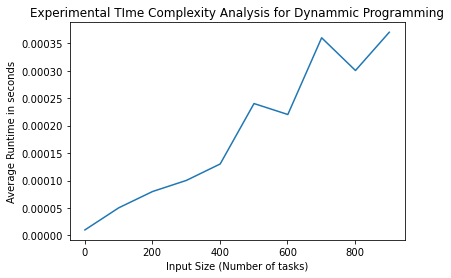

In [37]:
plt.title('Experimental TIme Complexity Analysis for Dynammic Programming')
plt.ylabel('Average Runtime in seconds')
plt.xlabel('Input Size (Number of tasks)')

plt.plot(inputs_list,runtime_list_dynamic)
plt.show()

We can see from the experimental analysis that we do not end up getting a straight line, and the asymptotic behavior is somewhat similar to an n<sup>2</sup> shape with a slight curve. Thus it is in accordance with our theoretical analysis. Also, if we focus on the shape of the graph, we see that it generally has more curve than the greedy algorithm.

#### Space Complexity Theoretical Analysis

When looking in terms of complexity, the dynamic programming approach will take up more space as compared to the greedy approach, as we are producing a table that will store all the values in its memory as we are making our calculations. Meaning if we were to compare the space complexity of both of these approaches, the dynamic approach would demand more space.

Looking at it in terms of bytes, we can think of each space in the table as an integer that is stored in the table. Thus the additional space we will require by introducing a table will be 4 * n<sup>2</sup> as each integer will take up 4 bytes of storage. So our space complexity will be O(n<sup>2</sup>2).

#### Space Complexity Experimental Analysis

In [24]:
space_list_dynamic = []
inputs_list = [n for n in range(1,1000,100)]
experiments = 100
for n in inputs_list:
    #Initialize variable to calculate the average for each input size
    sum_for_average = 0
    
    #Running trials to get an average value
    for trial in range(experiments):
        
        #Generate random tasks
        test_tasks = random_tasks_generator_dynamic(n)
        test_tasks_df = pd.DataFrame(test_tasks)
        
        
        tasks = [Task_Dynamic(*list(test_tasks_df.iloc[i])) for i in range(n)]
        
        #Space/memory calcuation
        tracemalloc.start()
        task_scheduler = Dynamic_TaskScheduler_no_print(tasks)
        task_scheduler.run_task_scheduler()
        end_time = time.time()
        sum_for_average += tracemalloc.get_traced_memory()[1]
        
    space_list_dynamic.append(sum_for_average/experiments)
    tracemalloc.stop()

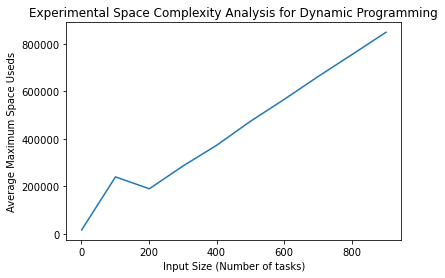

In [25]:
import matplotlib.pyplot as plt

plt.title('Experimental Space Complexity Analysis for Dynamic Programming')
plt.ylabel('Average Maximum Space Useds')
plt.xlabel('Input Size (Number of tasks)')

plt.plot(inputs_list,space_list_dynamic)
plt.show()

Our experimental and theoretical analysis for the space complexity of dynamic programming does not match. One possible reason can be that the input size is too small to reach the asymptotic behavior. However, increasing the input size any more will lead to more latency in running the program, which can be a hindrance.

# 4.Computational Critique

a. Do all of these implementations make use of the same data structures?

Both of our implementations mainly use similar data structures. However, the dynamic programming implementation makes use of a table as well. The other important difference is that the dynamic approach has two additional methods in order to calculate the maximum profit value, namely, get_combinations() which gives us a list of task duration and task priorities, and best_combo(), which provides us with the best profit value given the tasks.

b. Do they address all the concerns raised in question 1?

Both the schedulers addressed some of the concerns raised in question 1 but not all. When going with a greedy algorithm, we can see how adaptive it is, as even if we have to leave our schedule midway, we will be able to maximize our profit value until that point due to the greedy property. However, the greedy approach does not guarantee that we will get an optimal scheduler. As it is greedy, it will try to make multitaskable tasks happen together, even if they do not seem to go together, based on their priority value.

When going with dynamic programming, although we get the best possible profit values, we have to take out the time constraints because of the restriction it imposes on our calculations for the highest profit value. Also, the dynamic approach takes a long time to compute, which can seem like a hindrance when we have to make minor updates to the schedule and thus have to compute the scheduler again.

c. What metrics are you using to compare the schedule and the scheduler efficiencies?

The metrics that I have used are the time complexity of both. Through time complexities analysis, we see that the greedy algorithm tends to be faster and has a slower asymptotic growth rate, O(n logn), as compared to dynamic programming, O(n<sup>2</sup>).

Moreover, we can compare the space complexity. As dynamic is the only one using the additional table, and all other data structures are the same, it takes up that additional 4 * n<sup>2</sup> bytes space in the memory, which is a negative point when comparing both of the algorithms.

d. What experimental results offer convincing support for the theoretical arguments that
favour one algorithmic strategy over another?

Our experimental analysis for time complexity was in accordance with our theoretical analysis for both algorithms. Thus, it could be a supporting point in showing that the greedy algorithm will be a better choice computationally as it takes less time to compute compared to dynamic programming. However, we need to keep in mind that a greedy algorithm does not always give us the best output, which can be bad if we want a optimal schedule always. On the other hand, we also need to consider the fact that dynamic programming does not include time constraints. This limits its usage and practicality. 

When looking at the space complexity analysis, the theoretical analysis did not match with the experimental analysis for dynamic programming. One potential reason can be the limited input size, which was insufficient to show us asymptotic behavior. However, increasing the input size presented a problem as it took too long for the code to run, so we left it like that. Due to these factors, we can look at time complexities analysis when it comes to showing support for a particular algorithm over another as it provides us with clear evidence.

# Graphs To make Comparison of Complexities Easier:

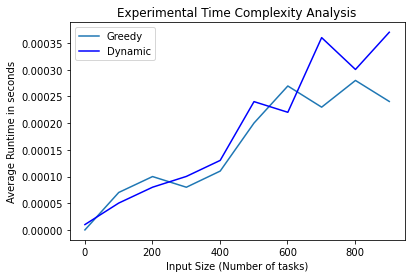

In [38]:
plt.ylabel('Average Runtime in seconds')
plt.xlabel('Input Size (Number of tasks)')

plt.title('Experimental Time Complexity Analysis')
plt.plot(inputs_list,runtime_list_greedy, label='Greedy')
plt.plot(inputs_list,runtime_list_dynamic, color='blue', label='Dynamic')
plt.legend()
plt.show()


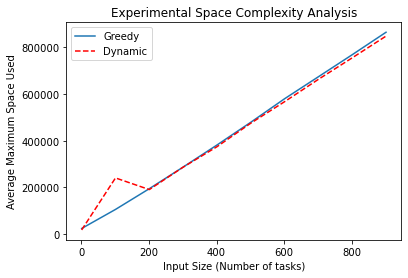

In [27]:

plt.plot(inputs_list,space_list_greedy, label='Greedy')
plt.plot(inputs_list,space_list_dynamic, color='red', label='Dynamic', linestyle='--')
plt.legend()

plt.title('Experimental Space Complexity Analysis')
plt.ylabel('Average Maximum Space Used')
plt.xlabel('Input Size (Number of tasks)')

plt.show()

# HCs and LOs

#### LOs

ComputationalCritique: In my last assignment, I could not properly understand how the algorithm was working, which led to some inaccuracies in my time recurrence calculation. My explanation regarding where the certain complexities came from and how we can better utilize them was also lacking. To improve upon that, I have ensured to include both a theoretical and experimental analysis of the complexities. Furthermore, I compared the complexities of the two algorithms and provided evidence for why a particular algorithm will be better based on the evidence I got from its analysis.

DataStructures: In my last assignment, my use of this LO was lacking as I did not delve into the depth of why a particular DataStructure is better than the other. I tried to overcome this by showing how a particular data structure that handles multi-tasking may be useful in some cases and also explained the potential drawbacks that might come with it in depth.

AlgorithmicStrategies: In my past classes, I couldn't provide an in-depth explanation of how the algorithm works. Sometimes my wording would be too vague, which would not be easily understandable to anyone. To improve upon that, I wrote an in-depth explanation of how the two algorithms discussed in this assignment worked to reach their final solution and also wrote detailed pseudocode, which can act as a backbone for that explanation.

#### HCs

audience: I professionally designed my assignment by going step by step from one to the next. This can be seen when we separate and complete one algorithmic strategy first, then the other, and finally bring their analysis together for comparison. Also, the formatting of the paper has been done in an effective manner. Overall, the way I tailored the assignment will easily be understandable by anyone who has basic knowledge of CS110.

constraints: It was an important part of my assignment as I had to base how my schedule was working based on certain constraints like the fixed time constraint and multi_tasking constraint. Although I could not implement the constraint for the multi_tasking, my usage of time constraint was still effective. By assigning the time constraint to a priority queue, I was able to keep track of the tasks that had a specific time to them. This second priority queue acted as a side list from which we could check in each iteration whether a particular time constraint task was coming up or not.

optimization: This HC was an important part of this whole assignment as our main goal was to optimize the task scheduler through two different algorithmic approaches, namely the greedy approach and the dynamic programming approach. We had to find the strategy that provided the optimal schedule and maximized our profit while also not using too much space and time.